## IS6 in Python: Displaying and Describing Data (Chapter 2)
### Shu-min Liao (sliao@amherst.edu)
*Question*: Who should be the author?
### July 11, 2022
### Introduction and background

This document is intended to assist students in undertaking examples shown in the Sixth Edition of Intro Stats (2022) by De Veaux, Velleman, and Bock. This pdf file as well as the associated ipynb reproducible analysis source file used to create it can be found at (INSERT WEBSITE LINK HERE).

### Chapter 2: Displaying and Describing Data
#### Section 2.1: Summarizing and Displaying a Categorical Variable

In [21]:
#Read in libraries. These are all the libraries we need for this chapter
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

In [22]:
#Table 2.1, page 18

#Read the txt file as csv
#(NOTE: when we have our website, will change the file path)
titanic_2020 = pd.read_csv("datasets/titanic_2020.txt", sep = "\t")
#Select the list of columns we want, make another dataframe
table_2_1 = titanic_2020[["Name", "Survived", "Age", "Gender", "Price.Paid", "Class"]]
#Show the first 11 people with 7 variables
table_2_1.iloc[:11, :]

,Name,Survived,Age,Gender,Price.Paid,Class
0,"ABBING, Mr Anthony",LOST,41.0,Male,7.55,3rd
1,"ABBOTT, Mr Eugene Joseph",LOST,13.0,Male,20.25,3rd
2,"ABBOTT, Mr Rossmore Edward",LOST,16.0,Male,20.25,3rd
3,"ABBOTT, Mrs Rhoda Mary 'Rosa'",SAVED,39.0,Female,20.25,3rd
4,"ABELSETH, Miss Kalle (Karen) Marie Kristiane",SAVED,16.0,Female,7.65,3rd
5,"ABELSETH, Mr Olaus Jørgensen",SAVED,25.0,Male,7.65,3rd
6,"ABELSON, Mr Samuel",LOST,30.0,Male,24.00,2nd
7,"ABELSON, Mrs Anna",SAVED,28.0,Female,24.00,2nd
8,"ABī SA'B, Mr Jirjis Yūsuf",LOST,45.0,Male,7.23,3rd
9,"ABī SA'B, Mrs Sha'nīnah",SAVED,38.0,Female,7.23,3rd


In [23]:
#Table 2.2, page 20
#Step 1: group passengers by class
table_2_2 = titanic_2020.groupby("Class")
#Step 2: Select only the class column
table_2_2 = table_2_2["Class"]
#Step 3: Count the number of passengers in each class using the count() function
table_2_2 = table_2_2.count()
#Step 4: "Rename" the count column for future reference (when plotting)
table_2_2 = table_2_2.reset_index(name = "Count")

#Once you are familiar with the process, you can collapse everything into one step, like this code below:
#table_2_2 = titanic_2020.groupby("Class")["Class"].count().reset_index(name = "Count")

print(table_2_2)

  Class  Count
0   1st    324
1   2nd    284
2   3rd    709
3  Crew    891


Question:

1.There is another way to "rename" the count column, but it is harder and more complex. Do we want to introduce that here?

2.Do we want to advocate for using the print() function or relying on the output cell? 

In [24]:
#Table 2.3, see on page 20
#To make a relative frequency table, there are 4 steps: 
#Step 1: Get the total number of passengers
total_passengers = titanic_2020["Class"].count()
#Step 2: Create a frequecy table (similar to table 2.2)
table_2_3 = titanic_2020.groupby("Class")["Class"].count()
#Step 3: Rescale count to percentage
table_2_3 = table_2_3/total_passengers * 100
#Step 4: "Rename" the percentage column for future reference (when plotting)
table_2_3 = table_2_3.reset_index(name = "Percentage (%)")

#One-line code, formatted for readability:
#table_2_3 = (
#                titanic_2020.groupby("Class")["Class"].count() #Frequency table
#                /
#                titanic_2020["Class"].count() * 100 #Scale to relative frequency table
#            ).reset_index(name = "Percentage (%)") #Rename percentage column
    
print(table_2_3)

  Class  Percentage (%)
0   1st       14.673913
1   2nd       12.862319
2   3rd       32.110507
3  Crew       40.353261


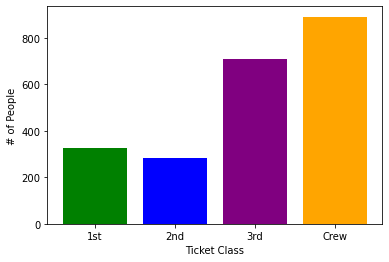

In [25]:
#Figure 2.2, page 20
#We will use matplotlib for this visualization

#Plot a bar plot, color is optional, code still runs without color argument
plt.bar(table_2_2["Class"], table_2_2["Count"], color = ["green", "blue", "purple", "orange"])

#Add lables
plt.xlabel("Ticket Class")
plt.ylabel("# of People")

#Display the plot
plt.show()

#### Section 2.2: Displaying a Quantitative Variable
#### Ages of Those Abroad the Titanic

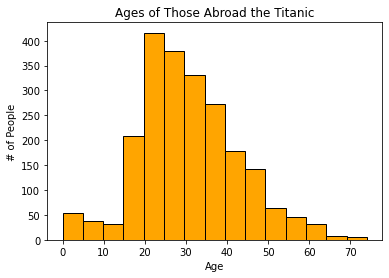

In [26]:
#Figure 2.7, page 25
#We will use matplotlib for this visualization
table_2_7 = titanic_2020["Age"].round(decimals = 0).dropna()

plt.hist(table_2_7, bins = 15, color = "orange",  edgecolor = "black")
plt.title("Ages of Those Abroad the Titanic")
plt.xlabel("Age")
plt.ylabel("# of People")
plt.show()

    Age  Count
0     0      3
1     1     17
2     2     14
3     3      8
4     4     12
..  ...    ...
67   67      1
68   69      1
69   70      1
70   71      4
71   74      1

[72 rows x 2 columns]


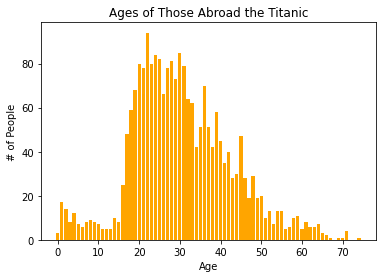

In [27]:
#EXTRA: We can also make a histogram using the bar() function (which technically makes it a bar graphs),
#assuming that x variable is ordered and continuous

#Figure 2.7, page 25
#We will use matplotlib for this visualization

#Make a dataframe counting passengers by age
#Round the age to the nearest integer
table_2_7 = titanic_2020.round(decimals = 0)
#Group passengers by age and count them
table_2_7 = table_2_7.groupby("Age")["Age"].count()
#Rename count column for future reference (when plotting)
table_2_7 = table_2_7.reset_index(name = "Count")
#Convert age from float to int
table_2_7["Age"] = table_2_7["Age"].astype(int)
print(table_2_7)

#Plot the bar graph
plt.bar(table_2_7["Age"], table_2_7["Count"], color = "orange")
plt.title("Ages of Those Abroad the Titanic")
plt.xlabel("Age")
plt.ylabel("# of People")
plt.show()


Question:

1.I do know how to group passengers every 5 years, but when I plot the bar graph x-axis will also be scaled down by 5 (0 - 14 instead of 0 - 70). What do you think? (Might ask Dhyey for solution)

#### Earthquakes and Tsunamis

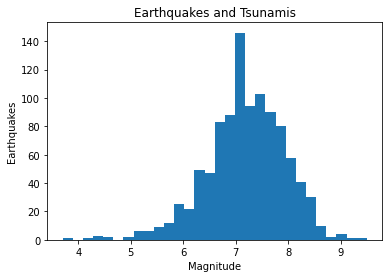

In [28]:
#Example 2.3, page 26
#We will use matplotlib for this visualization

#Read in data
tsunamis_2020 = pd.read_csv("datasets/tsunamis_2020.txt", sep = "\t")

#Plot graph
plt.hist(tsunamis_2020["Magnitude"], bins = 30)
plt.title("Earthquakes and Tsunamis")
plt.xlabel("Magnitude")
plt.ylabel("Earthquakes")
plt.show()

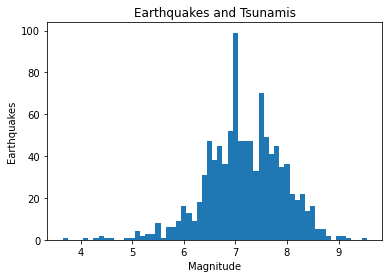

In [29]:
#EXTRA: We can also make a histogram using the bar() function, which makes it a bar graph.

#Example 2.3, page 26
#We will use matplotlib for this visualization

#Read in data
tsunamis_2020 = pd.read_csv("datasets/tsunamis_2020.txt", sep = "\t")
#Group by magnitude, count, and rename count column
tsunamis_2020 = tsunamis_2020.groupby("Magnitude")["Magnitude"].count().reset_index(name = "Count")

#Plot graph
plt.bar(tsunamis_2020["Magnitude"], tsunamis_2020["Count"], width = 0.1)
plt.title("Earthquakes and Tsunamis")
plt.xlabel("Magnitude")
plt.ylabel("Earthquakes")
plt.show()

#### Stem-and-Leaf Displays

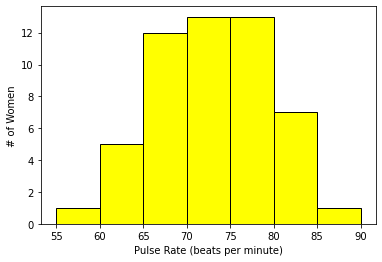

In [30]:
#Figure 2.8, page 27
#We will use matplotlib for this visualization
pulse_rates = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Pulse_rates.csv")
plt.hist(pulse_rates["Pulse"], bins = [55,60,65,70,75,80,85,90], color = "yellow", edgecolor = "black")
plt.xlabel("Pulse Rate (beats per minute)")
plt.ylabel("# of Women")

plt.show()

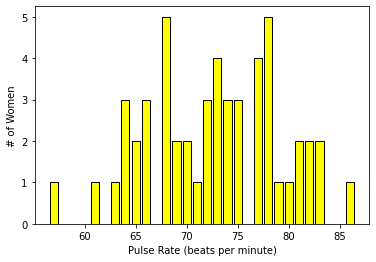

In [31]:
#EXTRA: We can also make a histogram using the bar() function, which makes it a bar graph.

#Figure 2.8, page 27
#We will be using matplotlib for this visualization

#Question: The problem is, though, we want you to get the credit, not him. What do you think?
pulse_rates = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Pulse_rates.csv")

pulse_rates = pulse_rates.groupby(pulse_rates.Pulse)["Pulse"].count().reset_index(name = "Count")

plt.bar(pulse_rates["Pulse"], pulse_rates["Count"], edgecolor = "black", color = "yellow")
plt.xlabel("Pulse Rate (beats per minute)")
plt.ylabel("# of Women")

plt.show()

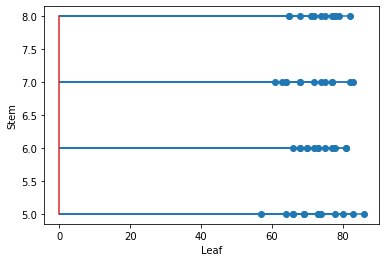

In [32]:
#Stem-and-leaf plot
#We will use matplotlib for this visualization
pulse_rates = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Pulse_rates.csv")

plt.stem([5,6,7,8] * 13, pulse_rates["Pulse"], orientation = "horizontal")
plt.xlabel("Leaf")
plt.ylabel("Stem")
plt.show()

Question: I don't know how to plot the "numerical" version of the stem-and-leaf plot. Also this plot is both uninformative and tricky to make (the function has things to do with broadcasting - arguments must match dimensions), so should we include this?

### Tips:
- plt.hist() can do the aggregating for you, while plt.bar() can not. This means that it is ok to put the whole dataframe in hist() and let it count for you, but you will have to group and count observations first before using bar().

#### Dot plot

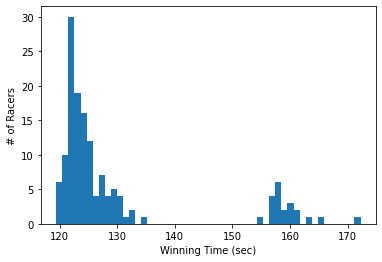

In [33]:
#Figure 2.9, page 28
#No package available to make a dot plot
derby = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Kentucky_Derby_2016.csv")

plt.hist(derby["Time_Sec"], bins = 50)
plt.xlabel("Winning Time (sec)")
plt.ylabel("# of Racers")
plt.show()

Question: I don't know how to make a dot plot. It seems that both matplotlib and seaborn don't have a function for dot plot. What should I do?

#### Density plots

<AxesSubplot:ylabel='Density'>

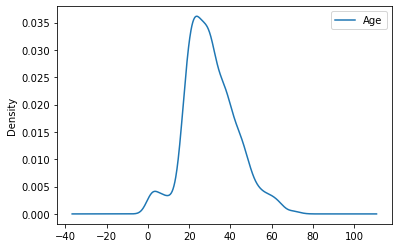

In [34]:
#Figure 2.10, page 28
#We will use pandas for this visualization
figure_2_10 = pd.read_csv("datasets/titanic_2020.txt", sep = "\t")

figure_2_10.plot(kind = "density", y = "Age", xlabel = "Age", ylabel = "Density")

Question: Is the a plt.show() equivalent for pandas plots? I wouldn't want to rely on the output cell, which might not be supported by other programs.

<AxesSubplot:xlabel='Age', ylabel='Density'>

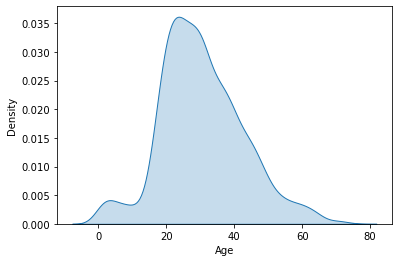

In [35]:
#Density plot but shaded
#We will use seaborn for this visualization. Unfortunately, pandas.plot does not support filling

sns.kdeplot(data = figure_2_10, x = "Age", fill = True )

#### Section 2.3: Shape
Displays on pages 29 - 30
#### Consumer Price Index

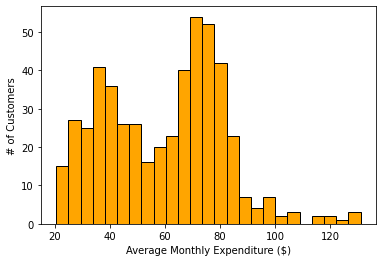

In [36]:
#We will use matplotlib for this visualization
cpi = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/CPI_Worldwide.csv")

plt.hist(cpi["Consumer.Price.Index"], bins = 25, color = "orange", edgecolor = "black")
plt.xlabel("Average Monthly Expenditure ($)")
plt.ylabel("# of Customers")

plt.show()

#### Credit Card Expenditures

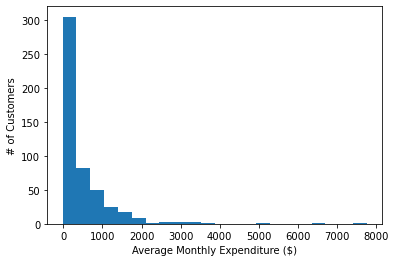

In [37]:
#We will use matplotlib for this visualization
credit = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Credit_card_charges.csv")

plt.hist(credit["Charges($)"], bins = 22)
plt.xlabel("Average Monthly Expenditure ($)")
plt.ylabel("# of Customers")
plt.show()

#### Section 2.4: Center
#### Finding Median and Mean

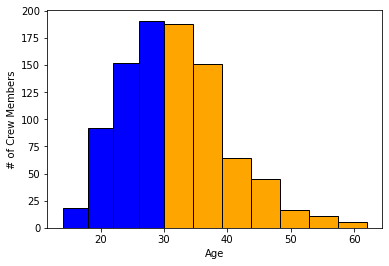

In [38]:
#Figure 2.15, page 33
#We will use matplotlib for this visualization
titanic = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Titanic.csv")

titanic_crew = titanic[titanic.Class == "Crew"]

#plt.hist(titanic_crew["Age"], bins = 10)
plt.hist(titanic_crew["Age"], range = [titanic_crew["Age"].min(), titanic_crew["Age"].median()], color = "blue", bins = 4, edgecolor = "black")
plt.hist(titanic_crew["Age"], range = [titanic_crew["Age"].median(), titanic_crew["Age"].max()], color = "orange", bins = 7, edgecolor = "black")
plt.xlabel("Age")
plt.ylabel("# of Crew Members")
plt.show()

Question: This is not optimal. I can't find a way to plot 2 colors on the same histogram (separate by median). Could you help me with this?

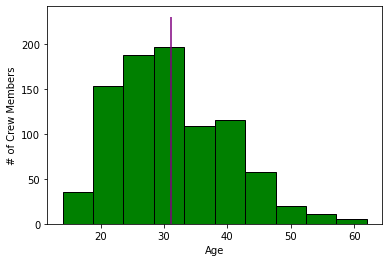

In [39]:
#Figure 2.16, page 34
#We will use matplotlib for this visualizations
plt.hist(titanic_crew["Age"], color = "green", edgecolor = "black")
plt.vlines(titanic_crew["Age"].mean(), 0, 230, color = "purple")
plt.xlabel("Age")
plt.ylabel("# of Crew Members")
plt.show()

In [40]:
#Summary statistics of the age of Titanic crews
titanic_crew["Age"].describe().astype(int)

count    889
mean      31
std        8
min       14
25%       24
50%       30
75%       37
max       62
Name: Age, dtype: int32

#### Section 2.5: Spread
We will be using the titanic_crew dataframe for the following examples
#### The Range

In [41]:
min_age = titanic_crew["Age"].min()
max_age = titanic_crew["Age"].max()
range_age = min_age - max_age
print("min age is:", min_age)
print("max age is:", max_age)
print("age range is:", range_age)

min age is: 14.0
max age is: 62.0
age range is: -48.0


#### The Interquartile Range

In [42]:
q1 = titanic_crew["Age"].quantile(0.25)
q3 = titanic_crew["Age"].quantile(0.75)
iqr = q3 - q1
print("First quantile is:", q1)
print("Third quantile is:", q3)
print("Interquartile range is:", iqr)

First quantile is: 24.0
Third quantile is: 37.0
Interquartile range is: 13.0


#### Standard Deviation

In [43]:
std = titanic_crew["Age"].std()
var = titanic_crew["Age"].var()
print("The standard deviation is:", std)
print("The variance is:", var)

The standard deviation is: 8.548559003972326
The variance is: 73.07786104439633


#### Summarizing a Distribution

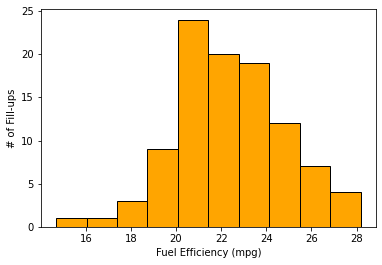

              mpg
count  100.000000
mean    22.411990
std      2.447137
min     14.684000
25%     20.842000
50%     22.051000
75%     23.984250
max     28.175000


In [44]:
#Step-by-Step Example, page 40 
#We will use matplotlib for this visualization
nissan = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Nissan.csv")

plt.hist(nissan["mpg"], color = "orange", edgecolor = "black")
plt.xlabel("Fuel Efficiency (mpg)")
plt.ylabel("# of Fill-ups")
plt.show()

summary = nissan.describe()
print(summary)

#### Random Matters

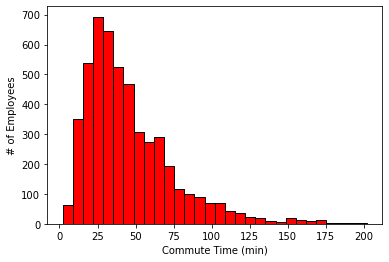

In [45]:
#Figure 2.19, page 43
#We will use matplotlib for this visualization
commute = pd.read_csv("http://nhorton.people.amherst.edu/is5/data/Population_Commute_Times.csv")

plt.hist(commute["Commute.Time"], bins = 30, color = "red", edgecolor = "black")
plt.xlabel("Commute Time (min)")
plt.ylabel("# of Employees")

plt.show()